In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
scale = [20,21,22,23,24,25,26,27,28]
LiveGraph = {}
LiveGraph['seek'] = \
[1.34E-7,1.77E-07,1.58E-07,3.40E-07,\
 2.36E-07,2.26E-07,2.27E-07,2.55E-07,2.71E-07]
LiveGraph['scan'] = \
[7.63E-09,2.10E-08,3.34E-08,3.19E-08,\
 3.31E-08,2.25E-08,2.78E-08,2.76E-08,3.84E-08]

LMDB = {}
LMDB['seek'] = \
[0.000000728,0.000000808,0.000000852,0.000001016,\
 0.00000114,0.000001278,0.00000141,0.000001452,0.000001492]
LMDB['scan'] = \
[0.00000014,0.000000144,0.000000176,0.00000011,\
0.000000144,0.000000148,0.000000124,0.000000344,0.000000208]

rocksDB = {}
rocksDB['seek'] = \
[0.000005294,0.000004956,0.000006558,0.000007777,\
0.00001044,0.000013499,0.000008892,0.000013241,0.000009305]
rocksDB['scan'] = \
[0.000000636,0.000000792,0.000001232,0.000001583,
0.000002881,0.000003248,0.000001923,0.000004332,0.000002624]


/Users/aaell/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


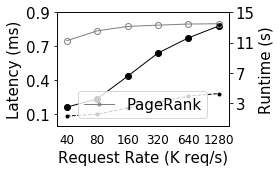

In [10]:
#!/usr/bin/env python3

params = {'legend.fontsize': 15,
          'lines.linewidth': 1,
          'pdf.fonttype': 42}
plt.rcParams.update(params)

fig, ax = plt.subplots()
fig.set_size_inches(4, 2.5)

latency_corun = [0.164245, 0.237357, 0.436652, 0.641406, 0.775183, 0.880378]
latency_alone = [0.085618, 0.102867, 0.155946, 0.209481, 0.26169, 0.284247]

time_pagerank = [11.252377, 12.556378, 13.143194, 13.312559, 13.461941, 13.500465]


ax.plot([1, 2, 4, 8, 16, 32], latency_corun, '-o', color='black', label='LinkBench Co-run')
ax.plot([1, 2, 4, 8, 16, 32], latency_alone, '--.', color='black', label='LinkBench Alone')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim([0.8, 40])
ax.set_ylim([0, 1])
ax.set_xlabel('Request Rate (K req/s)', fontsize=15)
ax.set_ylabel('Latency (ms)', fontsize=15)
ax.set_xticks([0.8, 1, 2, 4, 8, 16, 32, 40])
ax.set_xticklabels(['', '40', '80', '160', '320', '640', '1280', ''], fontsize=12)
ax.set_yticks([0.1, 0.4, 0.7, 1.0])
ax.set_yticklabels(['0.1', '0.4', '0.7', '0.9'], fontsize=15)
ax.tick_params(axis='x', which='both', top='off', bottom='off')

ax2 = ax.twinx()
ax2.plot([1, 2, 4, 8, 16, 32], time_pagerank, '-o', color='grey', markerfacecolor='none', label='PageRank')
# ax2.set_xscale('log')
# ax2.set_yscale('log')
ax2.set_xlim([0.8, 40])
ax2.set_ylim([0, 15])
# ax2.set_xticks([0.8, 1, 2, 4, 8, 16, 32, 40])
# ax2.set_xticklabels(['', '40K', '80K', '160K', '320K', '640K', '1.28M', ''], fontsize=15)
ax2.set_yticks([3, 7, 11, 15])
ax2.set_yticklabels(['3', '7', '11', '15'], fontsize=15)
ax2.set_ylabel('Runtime (s)', fontsize=15)

legend = ax2.legend(loc='lower center')
for legend_handle in legend.legendHandles:
    legend_handle.set_linewidth(1.0)
    legend_handle._legmarker.set_markersize(3)
# legend = ax.legend(loc='lower right')
# for legend_handle in legend.legendHandles:
#     legend_handle._legmarker.set_markersize(3)

fig.tight_layout()
#fig.savefig('htap_32_olap_workers.pdf')

